In [1]:
from scgenome.tantalus import get_data
from scgenome.qc import qc_cn
from IPython.display import display

hmmcopy_tickets = [
#     'SC-1935',
    'SC-1936',
#     'SC-1937',
]

sample_ids = [
#     'SA922',
    'SA921', 
#     'SA1090',
]

data = get_data(hmmcopy_tickets, sample_ids, cached=True)
cn_data = data[0]
segs_data = data[1]
metrics_data = data[2]
align_metrics_data = data[3]

print("cn_data.head()")
display(cn_data.head())

#cn = qc_cn(metrics_data, cn_data)
#print("cn.head()")
#display(cn.head())

/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype('category')
/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].cat.set_categories(col_categories[col])
2019-09-09 15:27:13,005 - INFO - 3cac052e-ce4e-44c2-a8be-3728c2dfb629 - TokenRequest:Getting token with client credentials.
2019-09-09 15:27:13,248 - INFO - 3cac052e-ce4e-44c2-a8be-3728c2dfb629 - OAuth2Client:Get Token Server r

cn_data.head()


,chr,start,end,reads,gc,copy,state,cell_id,sample_id,library_id
0,1,1,500000,0,-1.000000,NaN,2,SA921-A90554A-R12-C09,SA921,A90554A
1,1,500001,1000000,41,-1.000000,NaN,2,SA921-A90554A-R12-C09,SA921,A90554A
2,1,1000001,1500000,6,0.598332,1.754408,2,SA921-A90554A-R12-C09,SA921,A90554A
3,1,1500001,2000000,10,0.539498,1.873090,2,SA921-A90554A-R12-C09,SA921,A90554A
4,1,2000001,2500000,9,0.594508,2.515035,2,SA921-A90554A-R12-C09,SA921,A90554A


In [2]:
# Subset small amount of cells
n_cell = 10

keep_cells = cn_data["cell_id"].unique().sort_values()[0:n_cell] # sort because this is nondeterministic when kernel changes
sub_cn_data = cn_data[cn_data["cell_id"].isin(keep_cells)]

In [3]:
# BHC them!
from scgenome.cncluster import bayesian_cluster

linkage, root, cell_ids, matrix_data, measurement, variances = bayesian_cluster(sub_cn_data, n_states = sub_cn_data["state"].max())

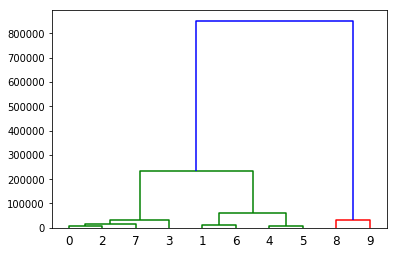

In [4]:
from scipy.cluster.hierarchy import dendrogram
from scgenome.simulation import get_plot_data

plinkage, plot_data = get_plot_data(linkage)
f = dendrogram(plot_data)



In [5]:
hmmcopy_tickets = ['SC-1937']
sample_ids = ['SA1090']

xdata = get_data(hmmcopy_tickets, sample_ids, cached=True)
xcn_data = xdata[0]
xsegs_data = xdata[1]
xmetrics_data = xdata[2]
xalign_metrics_data = xdata[3]

print("cn_data.head()")
display(xcn_data.head())

/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype('category')
/Users/massoudmaher/Documents/Code/scgenome/scgenome/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].cat.set_categories(col_categories[col])
2019-09-09 15:27:54,750 - INFO - 8e0465b2-4b1f-4a7f-bde9-47b05914255f - TokenRequest:Getting token with client credentials.
2019-09-09 15:27:54,948 - INFO - 8e0465b2-4b1f-4a7f-bde9-47b05914255f - OAuth2Client:Get Token Server r

cn_data.head()


,chr,start,end,reads,gc,copy,state,cell_id,sample_id,library_id
0,1,1,500000,2,-1.000000,NaN,2,SA1090-A96213A-R34-C64,SA1090,A96213A
1,1,500001,1000000,42,-1.000000,NaN,2,SA1090-A96213A-R34-C64,SA1090,A96213A
2,1,1000001,1500000,43,0.598332,3.017390,2,SA1090-A96213A-R34-C64,SA1090,A96213A
3,1,1500001,2000000,42,0.539498,1.936414,2,SA1090-A96213A-R34-C64,SA1090,A96213A
4,1,2000001,2500000,36,0.594508,2.439622,2,SA1090-A96213A-R34-C64,SA1090,A96213A


In [6]:
# Subset small amount of cells
xkeep_cells = xcn_data["cell_id"].unique().sort_values()[0:n_cell]
xsub_cn_data = xcn_data[xcn_data["cell_id"].isin(xkeep_cells)]

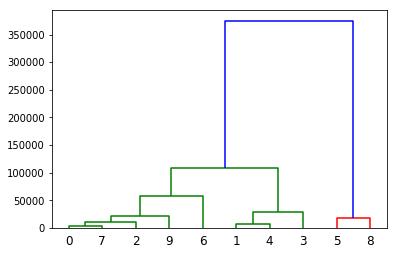

In [7]:
# BHC them!
xlinkage, xroot, xcell_ids, xmatrix_data, xmeasurement, xvariances = bayesian_cluster(xsub_cn_data, n_states = xsub_cn_data["state"].max())

xplinkage, xplot_data = get_plot_data(xlinkage)
f = dendrogram(xplot_data)

/Users/massoudmaher/Documents/Code/scgenome/scg/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/massoudmaher/Documents/Code/scgenome/scg/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


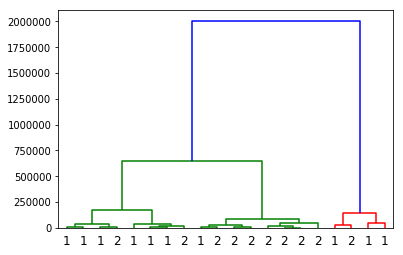

In [8]:
# Combine two datasets and see if we can seperate 
sub_cn_data["cell_id"] = "cl1_" + sub_cn_data["cell_id"].astype("str")
xsub_cn_data["cell_id"] = "cl2_" + xsub_cn_data["cell_id"].astype("str")

bi_cn_data = sub_cn_data.append(xsub_cn_data)
     
bilinkage, biroot, bicell_ids, bimatrix_data, bimeasurement, bivariances = bayesian_cluster(bi_cn_data, n_states = bi_cn_data["state"].max())

biplinkage, biplot_data = get_plot_data(bilinkage)
f = dendrogram(biplot_data, labels = bicell_ids.str[2])

In [9]:
from scgenome import utils
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
bi_cn_mat, bi_cn_meas, bi_cn_ids = utils.cn_data_to_mat_data_ids(bi_cn_data, data_id="state")
y_labels = bi_cn_ids.str[2].astype(int) - 1

In [11]:
nbiplot_data = biplot_data.copy()
#nbiplot_data[:,2] = np.log(nbiplot_data[:,2])

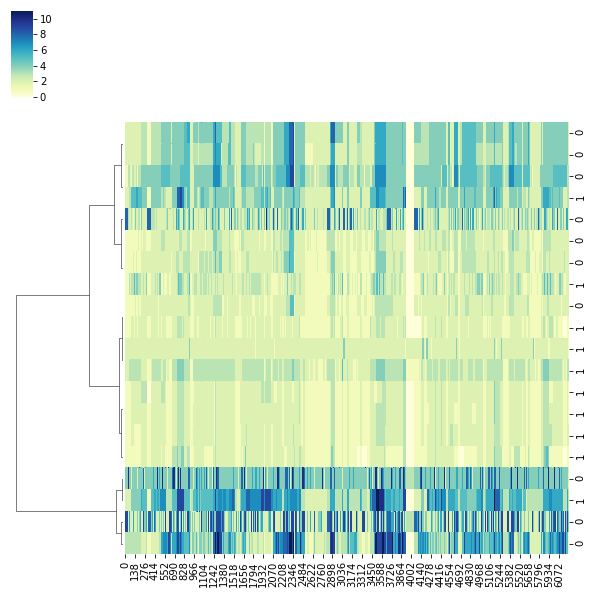

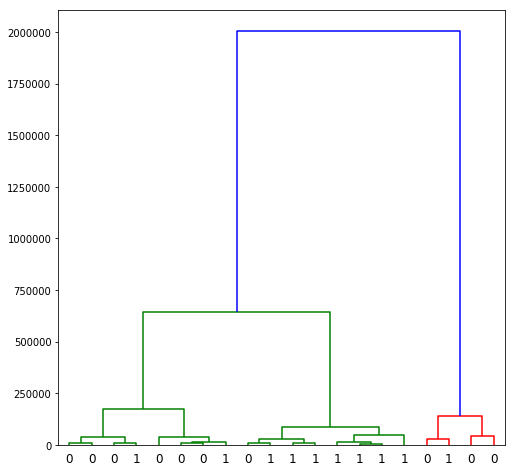

In [12]:
g = sns.clustermap(bi_cn_meas, col_cluster=False, row_linkage=nbiplot_data, yticklabels = y_labels, cmap="YlGnBu")

plt.figure(figsize=(8,8))
f = dendrogram(nbiplot_data, labels=y_labels)

IndexError: arrays used as indices must be of integer (or boolean) type

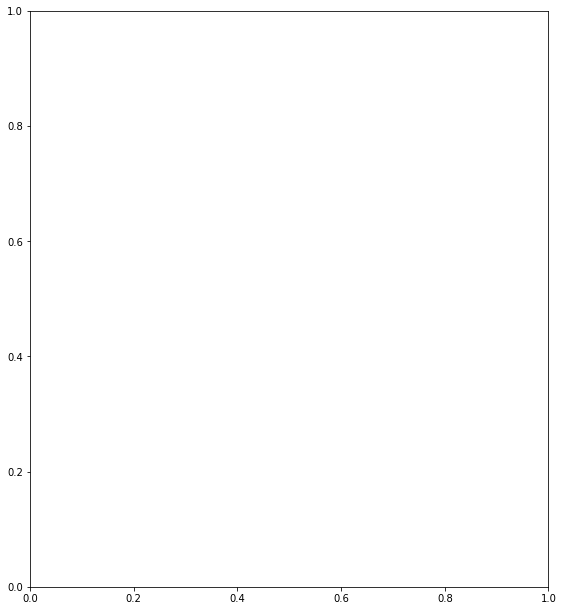

In [28]:
from scgenome.cnplot import plot_clustered_cell_cn_matrix_figure
from scgenome.cncluster import prune_cluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

###
from importlib import reload
import scgenome
reload(scgenome)
##

bifclustering = fcluster(biplot_data, 1.1)
bi_cn_data = prune_cluster(bifclustering, bi_cn_ids, bi_cn_data)

fig = plt.figure(figsize=(8,8))
bimatrix_data = scgenome.cnplot.plot_clustered_cell_cn_matrix_figure(fig, bi_cn_data, "state", cluster_field_name="bhc_cluster_id", linkage=biplot_data)

#def plot_clustered_cell_cn_matrix_figure(fig, cn_data, cn_field_name,
#                                         cluster_field_name='cluster_id',
#                                         raw=False, max_cn=13,
#                                         linkage=None, origin_field_name=None):

In [33]:
import pandas as pd
bi_cn_data.to_csv("/Users/massoudmaher/data/bi_cn_data.csv")
pd.DataFrame(biplot_data).to_csv("/Users/massoudmaher/data/biplot_data.csv")

In [ ]:
import pandas as pd
display(pd.DataFrame(plot_data))
pruned_clst = fcluster(plot_data, 30000, criterion = "distance")
print(pruned_clst)
f = dendrogram(plot_data, labels = pruned_clst)

In [ ]:
from scipy.cluster.hierarchy import fcluster
fclustering = fcluster(biplot_data, 1.1)
cell_ids = bi_cn_ids.copy()
cn_data = bi_cn_data

cn_data = cn_data.copy()
print(f"fclustering: {fclustering}")
cell_id_to_clst = {cell_ids[i]: fclustering[i] for i in range(len(fclustering))}
print(f"cell_id_to_clst: {cell_id_to_clst}")
#cn_data[cluster_field_name] = cell_id_to_clst[cn_data["cell_id"]]
cn_data["bhc_clst_id"] = cn_data["cell_id"].map(cell_id_to_clst)
print(f"cn_data {cn_data}")

#bi_bhc_clst = fcluster(biplot_data, 1.0)
#print(bi_cn_ids)
#pruned = mprune_cluster(bi_bhc_clst, bi_cn_ids, bi_cn_data)

In [ ]:
import scgenome
from importlib import reload
reload(scgenome)

In [35]:
np.array(bi_cn_ids)

array(['cl1_SA921-A90554A-R05-C57', 'cl1_SA921-A90554A-R08-C54',
       'cl1_SA921-A90554A-R08-C55', 'cl1_SA921-A90554A-R08-C56',
       'cl1_SA921-A90554A-R08-C57', 'cl1_SA921-A90554A-R11-C16',
       'cl1_SA921-A90554A-R12-C03', 'cl1_SA921-A90554A-R12-C05',
       'cl1_SA921-A90554A-R12-C07', 'cl1_SA921-A90554A-R12-C09',
       'cl2_SA1090-A96213A-R22-C06', 'cl2_SA1090-A96213A-R28-C12',
       'cl2_SA1090-A96213A-R28-C13', 'cl2_SA1090-A96213A-R28-C18',
       'cl2_SA1090-A96213A-R28-C19', 'cl2_SA1090-A96213A-R32-C60',
       'cl2_SA1090-A96213A-R34-C60', 'cl2_SA1090-A96213A-R34-C62',
       'cl2_SA1090-A96213A-R34-C63', 'cl2_SA1090-A96213A-R34-C64'],
      dtype=object)